# 4.2\. **Outer product** (10 MINUTES)
Find the outer product of the following two vectors 

```python
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])
```

Do this in the following ways:

   * Using the function outer in numpy
   * Using a nested for loop or list comprehension
   * Using numpy broadcasting operatoins


In [1]:
import numpy as np

In [2]:
u = np.array([1,3,5,7])
v = np.array([2,4,6,8])
print(np.outer(u,v))
print(np.array([ [a*b for b in v] for a in u ]))
print(np.array([ v*a for a in u ]))

[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]
[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]
[[ 2  4  6  8]
 [ 6 12 18 24]
 [10 20 30 40]
 [14 28 42 56]]


# 4.4\. **equally spaced numbers and selection** (10 MINUTES)
Use np.linspace to create an array of 100 numbers between 0 and 2π (inclusive).

  * Extract every 10th element using slice notation
  * Reverse the array using slice notation
  * Extract elements where the absolute difference between the sine and cosine functions evaluated at that element is less than 0.1
  * Make a plot showing the sin and cos functions and indicate where they are close

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
temp = np.linspace(start=0, stop=2*np.pi, num=100, endpoint=True)
print(temp)
print(temp[0::10])
print(temp[-1::-1])

[0.         0.06346652 0.12693304 0.19039955 0.25386607 0.31733259
 0.38079911 0.44426563 0.50773215 0.57119866 0.63466518 0.6981317
 0.76159822 0.82506474 0.88853126 0.95199777 1.01546429 1.07893081
 1.14239733 1.20586385 1.26933037 1.33279688 1.3962634  1.45972992
 1.52319644 1.58666296 1.65012947 1.71359599 1.77706251 1.84052903
 1.90399555 1.96746207 2.03092858 2.0943951  2.15786162 2.22132814
 2.28479466 2.34826118 2.41172769 2.47519421 2.53866073 2.60212725
 2.66559377 2.72906028 2.7925268  2.85599332 2.91945984 2.98292636
 3.04639288 3.10985939 3.17332591 3.23679243 3.30025895 3.36372547
 3.42719199 3.4906585  3.55412502 3.61759154 3.68105806 3.74452458
 3.8079911  3.87145761 3.93492413 3.99839065 4.06185717 4.12532369
 4.1887902  4.25225672 4.31572324 4.37918976 4.44265628 4.5061228
 4.56958931 4.63305583 4.69652235 4.75998887 4.82345539 4.88692191
 4.95038842 5.01385494 5.07732146 5.14078798 5.2042545  5.26772102
 5.33118753 5.39465405 5.45812057 5.52158709 5.58505361 5.648520

[0.76159822 0.82506474 3.87145761 3.93492413]


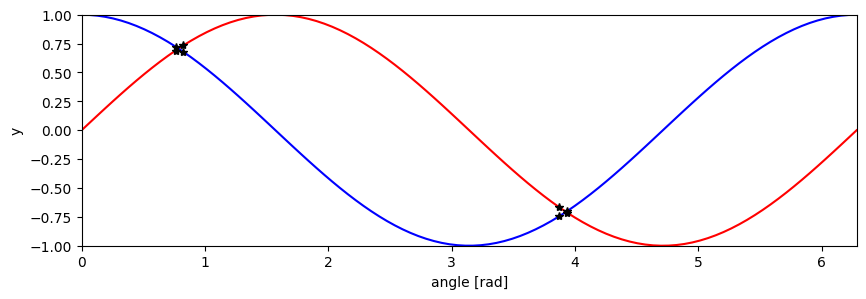

In [5]:
temp2=temp[np.abs(np.sin(temp)-np.cos(temp))<0.1]
print(temp2)
plt.subplots( nrows=1, ncols=1, figsize=(10,3) )
plt.plot(temp,np.sin(temp),'-r',label='sin')
plt.plot(temp,np.cos(temp),'-b',label='cos')
plt.plot(temp2,np.sin(temp2),'*k',label='sin')
plt.plot(temp2,np.cos(temp2),'*k',label='cos')
plt.xlim(0,2*np.pi)
plt.ylim(-1,1)
plt.xlabel('angle [rad]')
plt.ylabel('y')
plt.show()

# 4.6\. **Use broadcasting to create a grid of distances** (15 MINUTES)

Route 66 crosses the following cities in the US: Chicago, Springfield, Saint-Louis, Tulsa, Oklahoma City, Amarillo, Santa Fe, Albuquerque, Flagstaff, Los Angeles
The corresponding positions in miles are: 0, 198, 303, 736, 871, 1175, 1475, 1544, 1913, 2448

  * Construct a 2D grid of distances among each city along Route 66
  * Convert that in km (those savages...)
  
see https://scipy-lectures.org/intro/numpy/operations.html

In [6]:
import numpy as np

In [7]:
positions = np.array([0,198,303,736,871,1175,1475,1544,1913,2448])
print(np.abs(positions - positions[:, np.newaxis]))

[[   0  198  303  736  871 1175 1475 1544 1913 2448]
 [ 198    0  105  538  673  977 1277 1346 1715 2250]
 [ 303  105    0  433  568  872 1172 1241 1610 2145]
 [ 736  538  433    0  135  439  739  808 1177 1712]
 [ 871  673  568  135    0  304  604  673 1042 1577]
 [1175  977  872  439  304    0  300  369  738 1273]
 [1475 1277 1172  739  604  300    0   69  438  973]
 [1544 1346 1241  808  673  369   69    0  369  904]
 [1913 1715 1610 1177 1042  738  438  369    0  535]
 [2448 2250 2145 1712 1577 1273  973  904  535    0]]


# 4.7\. **Prime numbers sieve**  (20 MINUTES)
Compute the prime numbers in the 0-N (N=99 to start with) range with a sieve (mask).
  * Constract a shape (100,) boolean array, the mask
  * Identify the multiples of each number starting from 2 and set accordingly the corresponding mask element
  * Apply the mask to obtain an array of ordered prime numbers
  * Check the performances (timeit); how does it scale with N?
  * Implement the optimization suggested in the [sieve of Eratosthenes](https://en.wikipedia.org/wiki/Sieve_of_Eratosthenes)
  
see https://scipy-lectures.org/intro/numpy/array_object.html
  

In [8]:
import numpy as np
import time
import matplotlib.pyplot as plt

In [9]:
def all_primes(N):
    t0=time.time()
    bool_mask = np.ones(shape=(N,),dtype=bool)
    # firstly, I eliminate 0 and 1 since they're not prime
    bool_mask[:2] = False
    # then, for every number >=2,
    for idx in np.arange(start=2,stop=N,step=1):
    # I identify its higher multiples
        bool_mask[2*idx::idx] = False
    t1=time.time()
    # bool_mask.nonzero() 
    return (t1-t0)

In [10]:
def optimized_all_primes(N):
    t0=time.time()
    bool_mask = np.ones(shape=(N,),dtype=bool)
    # firstly, I eliminate 0 and 1 since they're not prime
    bool_mask[:2] = False
    # then, for every number >=2,
    for idx in np.arange(start=2,stop=int(np.sqrt(len(bool_mask))),step=1):
    # I identify its higher multiples
        bool_mask[2*idx::idx] = False
    t1=time.time()
    # bool_mask.nonzero() 
    return (t1-t0)

In [11]:
N = np.logspace(start=2,stop=7,num=6,endpoint=True,dtype=int)
t = [ all_primes(n) for n in N ]
t_optimized = [ optimized_all_primes(n) for n in N ]

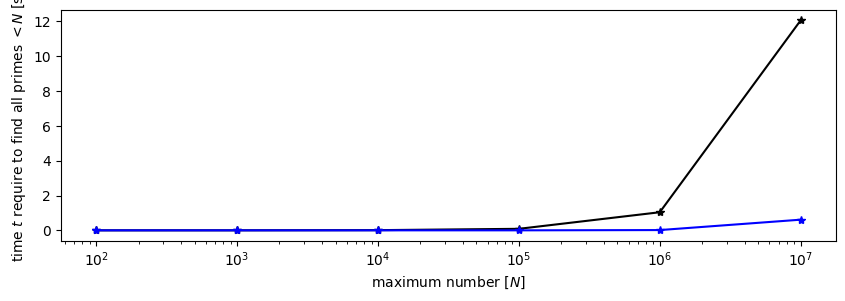

In [12]:
plt.subplots( nrows=1, ncols=1, figsize=(10,3) )
plt.plot(N,t,'-*k',label='data')
plt.plot(N,t_optimized,'-*b',label='data')
plt.xlabel('maximum number [$N$]')
plt.ylabel('time $t$ require to find all primes $<N$ [s]')
plt.xscale('log')
plt.show()

# 4.8\. **Diffusion using random walk** (30 MINUTES)

Consider a simple random walk process: at each step in time, a walker jumps right or left (+1 or -1) with equal probability. The goal is to find the typical distance from the origin of a random walker after a given amount of time. 
To do that, let's simulate many walkers and create a 2D array with each walker as a raw and the actual time evolution as columns

  * Take 1000 walkers and let them walk for 200 steps
  * Use randint to create a 2D array of size walkers x steps with values -1 or 1
  * Build the actual walking distances for each walker (i.e. another 2D array "summing on each raw")
  * Take the square of that 2D array (elementwise)
  * Compute the mean of the squared distances at each step (i.e. the mean along the columns)
  * Plot the average distances (sqrt(distance\*\*2)) as a function of time (step)
  
Did you get what you expected?

see https://scipy-lectures.org/intro/numpy/operations.html

In [13]:
import numpy as np
import numpy.random
import matplotlib.pyplot as plt

In [14]:
walkers=1000
n_steps=200
t = np.arange(start=0,stop=n_steps,step=1)

In [15]:
steps = 2*np.random.randint(low=0,high=1+1,size=(walkers, n_steps)) - 1
print(steps)

[[ 1 -1  1 ...  1 -1  1]
 [-1 -1  1 ...  1  1 -1]
 [ 1 -1 -1 ... -1 -1 -1]
 ...
 [-1  1  1 ... -1 -1  1]
 [-1  1 -1 ... -1  1  1]
 [ 1 -1 -1 ...  1  1 -1]]


In [16]:
positions = np.cumsum(steps, axis=1)
print(positions)

[[  1   0   1 ...   4   3   4]
 [ -1  -2  -1 ...  14  15  14]
 [  1   0  -1 ... -22 -23 -24]
 ...
 [ -1   0   1 ... -30 -31 -30]
 [ -1   0  -1 ... -18 -17 -16]
 [  1   0  -1 ... -20 -19 -20]]


In [17]:
sq_distance = positions**2
print(sq_distance)

[[  1   0   1 ...  16   9  16]
 [  1   4   1 ... 196 225 196]
 [  1   0   1 ... 484 529 576]
 ...
 [  1   0   1 ... 900 961 900]
 [  1   0   1 ... 324 289 256]
 [  1   0   1 ... 400 361 400]]


In [18]:
mean_sq_distance = np.mean(sq_distance, axis=0)
print(mean_sq_distance)

[  1.      1.94    2.936   3.88    5.      6.088   7.344   7.952   9.16
  10.276  11.216  12.34   13.536  14.576  15.792  16.64   17.696  18.772
  20.4    21.252  22.056  22.836  24.112  25.332  26.352  27.228  28.128
  28.668  30.152  30.704  31.088  32.252  33.128  34.524  35.184  36.296
  36.896  37.568  38.52   39.268  40.392  41.232  42.464  43.82   44.544
  45.56   46.72   47.588  48.448  49.176  50.632  51.296  52.864  53.66
  54.984  56.94   57.816  58.612  60.12   62.296  64.2    66.172  67.328
  68.336  69.736  70.268  72.016  72.88   74.464  75.788  75.352  76.812
  77.04   77.188  77.312  77.688  78.84   79.656  80.968  80.784  81.776
  82.42   83.392  84.66   84.52   86.336  88.544  89.328  89.272  90.36
  91.272  92.276  93.192  94.332  95.104  95.344  97.2    99.624 100.392
 101.012 103.12  103.316 104.776 106.596 108.504 110.088 110.616 111.076
 111.384 111.328 111.88  112.848 114.176 116.564 117.6   119.84  120.8
 122.292 122.584 122.96  123.048 123.628 124.48  124.748

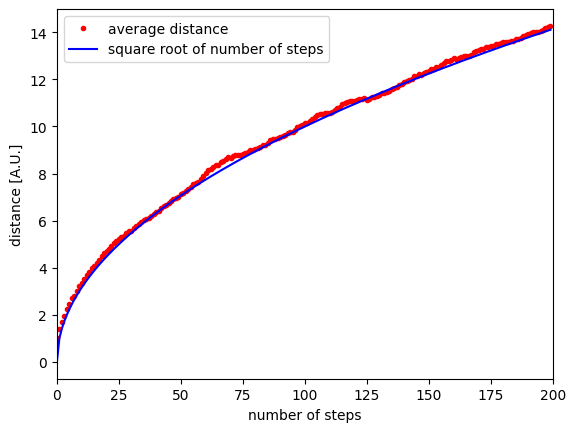

In [19]:
plt.plot(t, np.sqrt(mean_sq_distance),'r.',label='average distance')
plt.plot(t, np.sqrt(t),'b-',label='square root of number of steps')
plt.xlim(0,n_steps)
plt.xlabel('number of steps')
plt.ylabel('distance [A.U.]')
plt.legend()
plt.show()

# 4.9\. **Analyze a data file** (15 MINUTES)

  * Download the population of hares, lynxes and carrots at the beginning of the last century.
    ```python
    ! wget https://www.dropbox.com/s/3vigxoqayo389uc/populations.txt
    ```

  * Check the content by looking within the file
  * Load the data (use an appropriate numpy method) into a 2D array
  * Create arrays out of the columns, the arrays being (in order): *year*, *hares*, *lynxes*, *carrots* 
  * Plot the 3 populations over the years
  * Compute the main statistical properties of the dataset (mean, std, correlations, etc.)
  * Which species has the highest population each year?

Do you feel there is some evident correlation here? [Studies](https://www.enr.gov.nt.ca/en/services/lynx/lynx-snowshoe-hare-cycle) tend to believe so.

https://scipy-lectures.org/intro/numpy/auto_examples/plot_populations.html

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [21]:
data = np.loadtxt('populations.txt')
print(data)

[[ 1900. 30000.  4000. 48300.]
 [ 1901. 47200.  6100. 48200.]
 [ 1902. 70200.  9800. 41500.]
 [ 1903. 77400. 35200. 38200.]
 [ 1904. 36300. 59400. 40600.]
 [ 1905. 20600. 41700. 39800.]
 [ 1906. 18100. 19000. 38600.]
 [ 1907. 21400. 13000. 42300.]
 [ 1908. 22000.  8300. 44500.]
 [ 1909. 25400.  9100. 42100.]
 [ 1910. 27100.  7400. 46000.]
 [ 1911. 40300.  8000. 46800.]
 [ 1912. 57000. 12300. 43800.]
 [ 1913. 76600. 19500. 40900.]
 [ 1914. 52300. 45700. 39400.]
 [ 1915. 19500. 51100. 39000.]
 [ 1916. 11200. 29700. 36700.]
 [ 1917.  7600. 15800. 41800.]
 [ 1918. 14600.  9700. 43300.]
 [ 1919. 16200. 10100. 41300.]
 [ 1920. 24700.  8600. 47300.]]


In [22]:
year, hares, lynxes, carrots = data.T

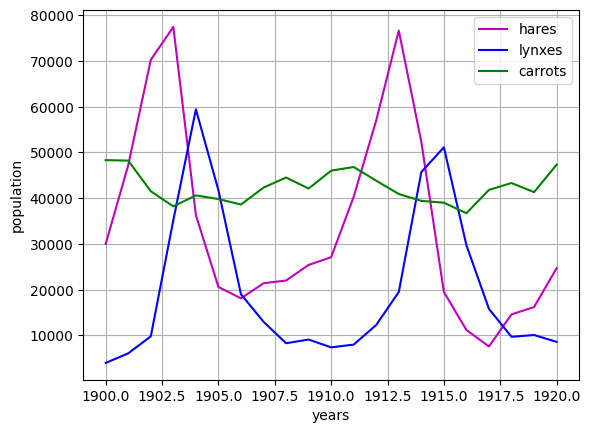

In [23]:
plt.plot(year,hares,'-m',label='hares')
plt.plot(year,lynxes,'-b',label='lynxes')
plt.plot(year,carrots,'-g',label='carrots')
plt.xlabel('years')
plt.ylabel('population')
plt.legend()
plt.grid()
plt.show()

In [24]:
temp = pd.read_csv('populations.txt',sep="\t")
df = pd.DataFrame(temp)
df.describe()

,# year,hare,lynx,carrot
count,21.000000,21.000000,21.000000,21.000000
mean,1910.000000,34080.952381,20166.666667,42400.000000
std,6.204837,21413.981859,16655.999920,3404.555771
min,1900.000000,7600.000000,4000.000000,36700.000000
25%,1905.000000,19500.000000,8600.000000,39800.000000
50%,1910.000000,25400.000000,12300.000000,41800.000000
75%,1915.000000,47200.000000,29700.000000,44500.000000
max,1920.000000,77400.000000,59400.000000,48300.000000


In [25]:
print("Maximum population in year ")
populations = data[:,1:]#create new dataset without years in it.
for i in range(len(populations)):
    j = np.argmax(populations[i,:])
    if j==0:
        print(int(year[i]),': Hares')
    elif j==1:
        print(int(year[i]),': Lynxes')
    else:
        print(int(year[i]),': Carrots')

Maximum population in year 
1900 : Carrots
1901 : Carrots
1902 : Hares
1903 : Hares
1904 : Lynxes
1905 : Lynxes
1906 : Carrots
1907 : Carrots
1908 : Carrots
1909 : Carrots
1910 : Carrots
1911 : Carrots
1912 : Hares
1913 : Hares
1914 : Hares
1915 : Lynxes
1916 : Carrots
1917 : Carrots
1918 : Carrots
1919 : Carrots
1920 : Carrots


# 5.4\. **load the binary file named *credit_card.dat* and convert the data into the real credit-card number** (20 MINUTES).

Each line correspond to a credit card number.

Each character is composed by 6 bit (even the space) and the last 4 bit are just a padding

**hint**: use the `chr()` function to convert a number to a char

In [26]:
import numpy as np

to_discard = 4
each_char = 6
file_name = "credit_card.dat"
card_list = []
with open(file_name, mode='r') as f:
    for line in f:
        card_num=''
        char_start = np.arange(start = 0, stop = len(line) - to_discard, step = each_char , dtype = int)[:-1]
        for i in char_start:
            y = line[i:i+6]
            card_num+=chr(int(y,2))
        if card_num == '':#to remove any cases if the cardnum can be empty
            continue
        card_list.append(card_num)
f.close()
print(card_list)


['7648 5673 3775 2271', '3257 8247 3354 2266', '2722 0001 4011 6652', '0661 3063 3742 3150', '0432 1608 1462 4742', '5827 2027 8785 7303', '5774 8528 2087 1117', '8140 1210 6352 2845', '5764 1133 7301 7100', '6456 1737 4126 6726', '1228 8631 7382 0000', '7051 0160 5374 3166', '0618 3587 1630 6376', '1545 5454 7444 5636', '6735 3116 3202 6834', '7287 5011 1547 8413', '7033 2607 3328 4200', '2568 5244 1874 5024', '1684 2253 7570 7118', '0672 2576 0575 6631', '6332 8353 8787 1340', '1813 3361 1175 4211', '2477 6450 8840 2368', '5512 3505 2563 1326', '3083 7882 0621 0025', '4521 5148 8045 0334', '7563 3654 8713 5787', '8324 2664 0476 5561', '0565 2504 7168 3510', '5107 5507 1767 0738', '2462 1821 2448 1443', '2788 0638 6861 6554', '5851 5873 5474 0547', '0670 1004 4013 2655', '5874 5506 3048 0806', '2805 5401 8462 1260', '5083 8406 6310 1862', '1076 1445 3013 2266', '8440 4804 4844 5277', '4758 6141 0686 1387', '7586 0675 0315 2568', '2544 1258 7432 5165', '3474 5023 4434 5626', '1410 0270

# 6. **Pandas analysis** (60 MINUTES)

This exercise consists in analyzing a dataset containg timing information from a series of Time-to-Digital-Converters (TDC) implemented in a couple of FPGAs. Each measurement (i.e. each row of the input file) consists of a flag that specifies the type of message ('HEAD', which in this case is always 1), two addresses of the TDC providing the signal ('FPGA' and 'TDC_CHANNEL'), and the timing information ('ORBIT_CNT', 'BX_COUNTER', and 'TDC_MEAS'). Each TDC count corresponds to 25/30 ns, whereas a unit of BX_COUNTER corresponds to 25 ns, and the ORBIT_CNT is increased every 'x' BX_COUNTER. This allows to store the time in a similar way to hours, minutes and seconds.

1\. Create a Pandas DataFrame reading N rows of the 'data_000637.txt' dataset. Choose N to be smaller than or equal to the maximum number of rows and larger that 10k.

2\. Find out the number of BX in a ORBIT (the value 'x').

3\. Find out how much the data taking lasted. You can either make an estimate based on the fraction of the measurements (rows) you read, or perform this check precisely by reading out the whole dataset.

4\. Create a new column with the absolute time in ns (as a combination of the other three columns with timing information).

5\. Replace the values (all 1) of the HEAD column randomly with 0 or 1.

6\. Create a new DataFrame that contains only the rows with HEAD=1.

7\. Make two occupancy plots (one for each FPGA), i.e. plot the number of counts per TDC channel

8\. Use the groupby method to find out the noisy channels, i.e. the TDC channels with most counts (say the top 3)

9\. Count the number of unique orbits. Count the number of unique orbits with at least one measurement from TDC_CHANNEL=139

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
data = pd.read_csv('data_000637.txt')
N_max = data.size
df = data[:10000]
df.head()

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,1,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25


In [29]:
val = df['ORBIT_CNT'].unique()
conversions = np.array([ (df['BX_COUNTER'][df['ORBIT_CNT']==v]).max() for v in val ])
BX_per_orbit = np.max(conversions)
print('the estimated value of x is: ', BX_per_orbit )

the estimated value of x is:  3563


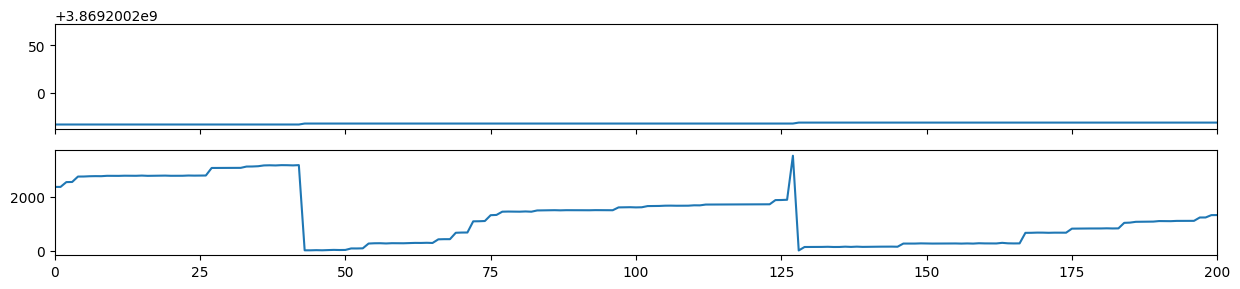

In [30]:
fig, ax = plt.subplots( 2,1, sharex=True, figsize = (15,3))
ax[0].plot( df['ORBIT_CNT'])
ax[1].plot(df['BX_COUNTER'] )
ax[1].set_xlim(0,200)
#plt.hlines( BX_per_orbit, df['ORBIT_CNT'].min() ,df['ORBIT_CNT'].max() )
plt.show()

In [31]:
s_per_tdc = (df['TDC_MEAS'].unique()).max()
print(s_per_tdc)

29


In [32]:
orbit_cnt = ( df['ORBIT_CNT']-df['ORBIT_CNT'].min() )*BX_per_orbit*25 # ns
bx_counter = df['BX_COUNTER']*25 # ns
tdc_means = df['TDC_MEAS']*s_per_tdc # ns
time = np.asarray(orbit_cnt + bx_counter + tdc_means)
print('the data taking lasted: ', (time[-1]-time[0])*10**(-6),' seconds')

the data taking lasted:  8.867198  seconds


In [33]:
df.assign(time = time)

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS,time
0,1,0,123,3869200167,2374,26,60104
1,1,0,124,3869200167,2374,27,60133
2,1,0,63,3869200167,2553,28,64637
3,1,0,64,3869200167,2558,19,64501
4,1,0,64,3869200167,2760,25,69725
...,...,...,...,...,...,...,...
9995,1,0,61,3869200267,696,11,8925219
9996,1,0,60,3869200267,701,5,8925170
9997,1,0,59,3869200267,707,23,8925842
9998,1,0,63,3869200267,706,15,8925585


In [34]:
print( np.random.choice([0,1],df.shape[0]) )
df['HEAD']= np.random.choice([0,1],df.shape[0])
df

[0 1 1 ... 0 1 0]


C:\Users\ecica\AppData\Local\Temp\ipykernel_8368\2923328113.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['HEAD']= np.random.choice([0,1],df.shape[0])


,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
2,0,0,63,3869200167,2553,28
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
...,...,...,...,...,...,...
9995,0,0,61,3869200267,696,11
9996,1,0,60,3869200267,701,5
9997,0,0,59,3869200267,707,23
9998,1,0,63,3869200267,706,15


In [35]:
new_df = df[df['HEAD']==1]
new_df

,HEAD,FPGA,TDC_CHANNEL,ORBIT_CNT,BX_COUNTER,TDC_MEAS
0,1,0,123,3869200167,2374,26
1,1,0,124,3869200167,2374,27
3,1,0,64,3869200167,2558,19
4,1,0,64,3869200167,2760,25
5,1,0,63,3869200167,2762,4
...,...,...,...,...,...,...
9991,1,0,64,3869200267,613,29
9992,1,0,63,3869200267,614,28
9996,1,0,60,3869200267,701,5
9998,1,0,63,3869200267,706,15


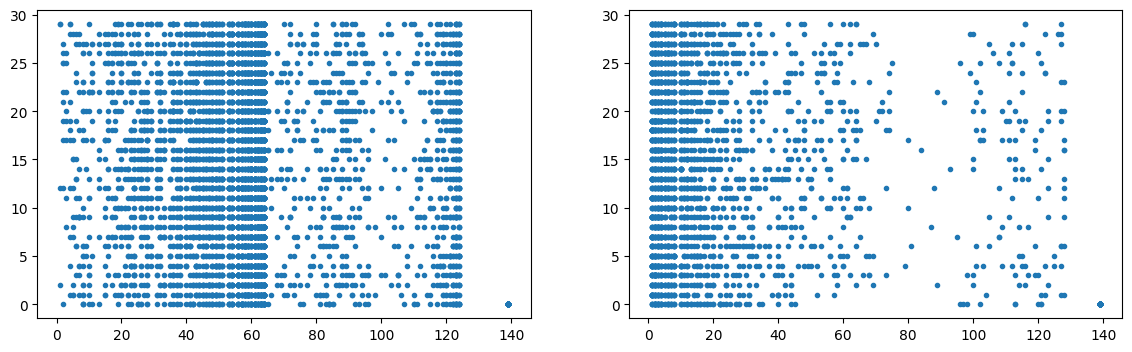

In [36]:
ns = df['FPGA'].unique()
gdf = df.groupby(['FPGA'])
fig, ax = plt.subplots( nrows=1, ncols = len(ns), figsize = (14,4) )
for j,n in enumerate(ns):
    filtered = gdf.get_group(j)
    ax[j].plot(filtered["TDC_CHANNEL"],filtered["TDC_MEAS"],'.')

In [37]:
gdf = df.groupby(['FPGA'])#Group the data on the basis of FPGA 0 or 1.
df0 = gdf.get_group(0)#Get only the dataframe corresponding to 0
df1 = gdf.get_group(1)#Get only the dataframe corresponding to 1
print(df0.sort_values(by='TDC_MEAS',ascending=False).head(3),'\n')
print(df1.sort_values(by='TDC_MEAS',ascending=False).head(3))

      HEAD  FPGA  TDC_CHANNEL   ORBIT_CNT  BX_COUNTER  TDC_MEAS
5073     0     0           64  3869200218         781        29
5724     1     0          123  3869200224        3349        29
7864     1     0           91  3869200245        1838        29 

      HEAD  FPGA  TDC_CHANNEL   ORBIT_CNT  BX_COUNTER  TDC_MEAS
8606     0     1           62  3869200253        1360        29
6855     1     1            1  3869200235        3028        29
5281     0     1           12  3869200220         333        29


# 7.1\. **Kernel Density Estimate** (40 MINUTES)

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


In [38]:
import numpy as np
import numpy.random
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.integrate import trapz

In [39]:
# I initialize the inputs
mu,sigma,N,n_sigma=0,3,1000,3
# I extract the array of normally distributed vaues
vect=np.random.normal(loc=mu,scale=sigma,size=N)

995.8676317757147 597.9


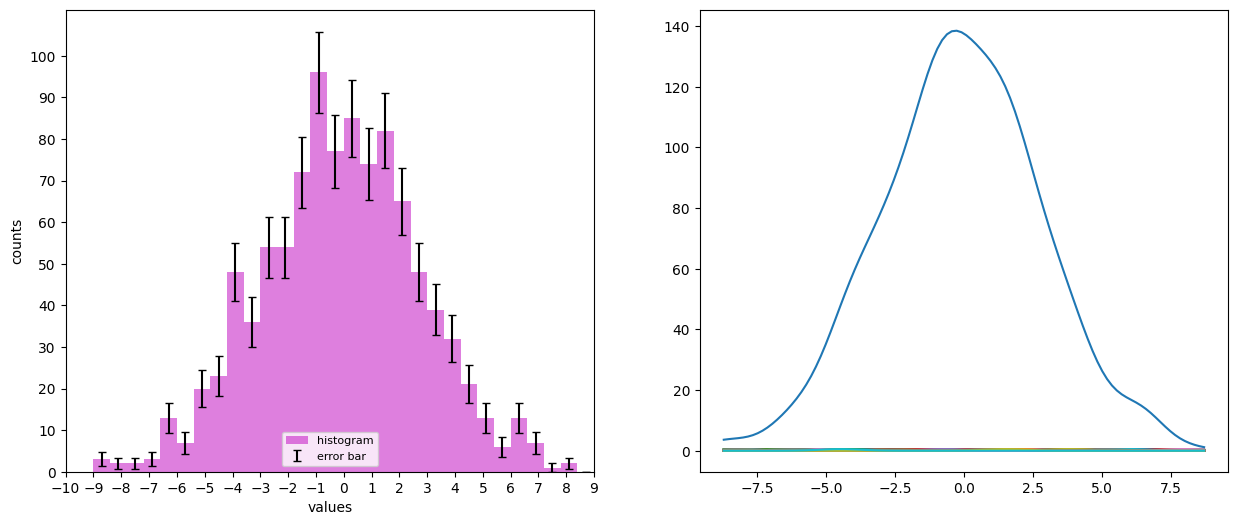

In [40]:
fix,ax=plt.subplots(1,2,figsize=(15,6))
# I set the number of bins as the square root of the amount of data
bins=np.linspace(start=-n_sigma*sigma,stop=+n_sigma*sigma,num = int(np.sqrt(N)))
# and represent the histogram
y,bins,_=ax[0].hist(vect,bins=bins,density=False,label='histogram',color='m',alpha=0.5)
x=(bins[1:]+bins[:-1])/2
ax[0].set_xlim(min(x),max(x))
ax[0].set_xlabel('values')
ax[0].set_ylabel('counts')
ax[0].set_xticks(ticks=np.arange(start=-n_sigma*sigma-1,stop=+n_sigma*sigma+1,step=1))
ax[0].set_yticks(ticks=np.arange(start=0,stop=int(np.max(y))+10,step=10))
ax[0].errorbar(x, y, yerr=np.sqrt(y),fmt='none',label='error bar',capsize=3,ecolor='k')
ax[0].legend(fontsize=8,loc='lower center')

temp = np.linspace(min(x),max(x),num=100)
scale = 1.06*vect.std()*(N)**(-1/5)
output = np.zeros_like(temp)
for loc in vect:
    output += norm.pdf(temp, loc = loc, scale = scale)
    ax[1].plot(temp,norm.pdf(temp, loc = loc, scale = scale))
print( trapz(output,temp) , trapz(y,x) )
ax[1].plot(temp,output)
plt.show()

# 7.2\. **Color-coded scatter plot** (10 MINUTES)

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

https://scipy-lectures.org/intro/matplotlib/auto_examples/plot_scatter.html

In [41]:
import matplotlib.pyplot as plt
import numpy as np

In [42]:
def my_data(mean1,mean2,std1,std2,N):
    x = np.random.normal(mean1, std1, N)
    y = np.random.normal(mean2, std2, N)
    return x, y

3 [   3    5    2    1 1000]


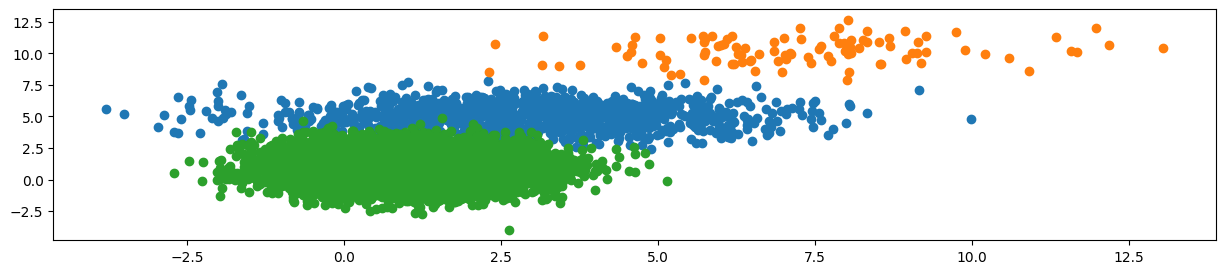

In [43]:
cat_param = np.array([[3,5,2,1,1000], [7,10,2,1,100], [1,1,1,1,10000] ])
print(cat_param.shape[0],cat_param[0])
fig,ax = plt.subplots( 1,1, figsize=(15,3))
for cat in cat_param:
    x, y = my_data(*cat)
    ax.scatter(x,y)

# 7.3\. **Profile plot** (30 MINUTES)

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

# 8.1\. **PCA on 3D dataset** (45 MINUTES)

* Generate a dataset with 3 features each with N entries (N being ${\cal O}(1000)$). With $N(\mu,\sigma)$ the normali distribution with mean $\mu$ and $\sigma$  standard deviation, generate the 3 variables $x_{1,2,3}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues of the covariance matrix of the dataset
* Find the eigenvectors and eigenvalues using SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained.
* Redefine the data in the basis yielded by the PCA procedure
* Plot the data points in the original and the new coordiantes as a set of scatter plots. Your final figure should have 2 rows of 3 plots each, where the columns show the (0,1), (0,2) and (1,2) proejctions.


In [44]:
import numpy as np
import pandas as pd
from scipy import linalg as la

In [45]:
N = 10**5
data1 = np.random.normal(loc=0.,scale=1.,size=N)
data2 = data1 + np.random.normal(loc=0.,scale=3.,size=N)
data3 = 2*data1 + data2
df = pd.DataFrame(data=np.array([data1,data2,data3]),index=['x1','x2','x3'])

In [46]:
co_mat=np.cov(df)
e_val,e_vect=la.eig(co_mat)
print(e_val,e_vect)

[2.71142421e+01+0.j 1.54456405e-15+0.j 2.01133555e+00+0.j] [[-0.11604403 -0.81649658  0.56556796]
 [-0.57663243 -0.40824829 -0.70769229]
 [-0.80872049  0.40824829  0.42344363]]


In [47]:
# I use SVD
e_vect_svd, spectrum, Vt = np.linalg.svd(co_mat)
# and estimate again that the eigenvalues and eigenvectors
e_val_svd = spectrum**2/(N-1)
# to check if the results from the two procedures are the same
print(e_val_svd,e_vect_svd)

[7.35189479e-03 4.04551114e-05 4.37124020e-36] [[-0.11604403  0.56556796 -0.81649658]
 [-0.57663243 -0.70769229 -0.40824829]
 [-0.80872049  0.42344363  0.40824829]]


In [48]:
# despite a switch in the column positions, the results are the visually the same

In [49]:
# we notice that one od the eigenvalues is extremely small: this is a sign that, through PCA, it will be possible to
# reduce the dimensionality of the problem by, at least, one 

In [50]:
# to find how much of the dataset variability is explained by the principal components
print('percentuali: ',e_val_svd/e_val_svd.sum()*100)

percentuali:  [9.94527436e+01 5.47256446e-01 5.91319439e-32]


In [51]:
# we see that
# - most of the variability (over 99%) lies in x1
# - a small amount (0.8%) of variability is due to x2
# - an insignificant amount of variability is related to x3: as by definition, x3 is strictly correlated to the other variables
#   x1 and x2 and can be easily dropped in the analysis
# furthermore, the goal is to include at least 99% of the system, which is well describe through x1: also x2 can be dropped
# we're left with just
print(data1)

[ 0.30137614  0.40755778 -0.50731896 ...  2.24768302 -0.4368147
  2.819374  ]


In [52]:
# to get the data in the eigenvector basis
e_df = pd.DataFrame(np.dot(e_vect.T,df))
print(e_df)

          0             1             2             3             4      \
0 -2.969945e+00  2.762781e-01  7.047356e-01  7.340709e+00  4.788727e+00   
1  1.293438e-16 -1.428043e-16  1.022104e-16 -3.738618e-16  3.397485e-17   
2 -7.650405e-02  7.773039e-01 -7.524093e-01  4.028143e-01 -1.830547e+00   

          5             6             7             8             9      ...  \
0 -6.602610e+00 -3.785674e-01 -9.560491e+00  2.711709e+00  5.895564e+00  ...   
1 -1.426352e-16  2.152445e-16  4.615265e-16 -4.401704e-16 -2.799495e-16  ...   
2  1.656565e-01 -1.118054e+00  1.317435e-02  1.194883e+00  6.493204e-01  ...   

          99990         99991         99992         99993         99994  \
0 -1.668335e+00 -3.870554e+00 -5.955177e+00  2.048278e+00 -1.339107e+00   
1 -2.304550e-16 -3.088800e-16  5.579083e-16 -4.138455e-16  1.896422e-16   
2  1.231428e+00  2.119403e+00 -1.177984e+00  1.607760e+00 -7.264994e-01   

          99995         99996         99997         99998         99999  
0  

# 8.3 \. **Looking at an oscillating spring** (60 MINUTES)

Imagine you have $n$ cameras looking at a spring oscillating along the $x$ axis. Each  camera record the motion of the spring looking at it along a given direction defined by the pair $(\theta_i, \phi_i)$, the angles in spherical coordinates. 

Start from the simulation of the records (say ${\cal O}(1000)$) of the spring's motion along the x axis, assuming a little random noise affects the measurements along the $y$. Rotate such dataset to emulate the records of each camera.

Perform a Principal Component Analysis on the thus obtained dataset, aiming at finding the only one coordinate that really matters.


In [53]:
import scipy.linalg as la

cameras = 5
theta =  np.random.uniform(0,90,cameras)
phi = np.random.uniform(0,180,cameras)
time = 100
r = np.random.uniform(0,1,time)
meas = np.zeros((cameras,time))
for i in range(cameras):
    meas[i,:] = r*np.sin(phi[i])*np.cos(theta[i])
val, vect = la.eig(np.cov(meas))
print(np.abs(val)/la.norm(val)*100)

[1.66710003e-14 1.00000000e+02 1.00079412e-15 1.38752551e-14
 6.41470121e-15]


# 9.1\. **Maximum wind speed prediction at the Sprogø station** (30 MINUTES)

The exercise goal is to predict the maximum wind speed occurring every 50 years even if no measure exists for such a period. The available data are only measured over 21 years at the Sprogø meteorological station located in Denmark. 

The annual maxima are supposed to fit a normal probability density function. However such function is not going to be estimated because it gives a probability from a wind speed maxima. Finding the maximum wind speed occurring every 50 years requires the opposite approach, the result needs to be found from a defined probability. That is the quantile function role and the exercise goal will be to find it. In the current model, it is supposed that the maximum wind speed occurring every 50 years is defined as the upper 2% quantile.

By definition, the quantile function is the inverse of the cumulative distribution function. The latter describes the probability distribution of an annual maxima. In the exercise, the cumulative probability $p_i$ for a given year i is defined as $p_i = i/(N+1)$ with $N = 21$, the number of measured years. Thus it will be possible to calculate the cumulative probability of every measured wind speed maxima. From those experimental points, the scipy.interpolate module will be very useful for fitting the quantile function. Finally the 50 years maxima is going to be evaluated from the cumulative probability of the 2% quantile.

Practically, load the dataset:

```python
import numpy as np
max_speeds = np.load('max-speeds.npy')
years_nb = max_speeds.shape[0]
```

Compute then the cumulative probability $p_i$ (`cprob`) and sort the maximum speeds from the data. Use then the  UnivariateSpline from scipy.interpolate to define a quantile function and thus estimate the probabilities.

In the current model, the maximum wind speed occurring every 50 years is defined as the upper 2% quantile. As a result, the cumulative probability value will be:

```python
fifty_prob = 1. - 0.02
```

So the storm wind speed occurring every 50 years can be guessed as:

``` python
fifty_wind = quantile_func(fifty_prob)
```

https://www.mat.uniroma2.it/~speleers/teaching/labcalc/ScipyLectures-simple.pdf (6.11.1)

In [54]:
import numpy as np
from scipy.interpolate import UnivariateSpline

In [55]:
# 1.1
# I import the data and get the essential information
max_speeds = np.load('max-speeds.npy')
print(max_speeds)
years_nb = max_speeds.shape[0]

[28.09 22.46 26.65 26.65 28.79 30.19 26.19 26.75 23.34 24.16 29.75 27.93
 26.68 23.85 32.97 25.79 26.37 25.28 26.73 23.2  26.76]


In [56]:
# 1.2
# I compute the cumulative probability based on the given formula
cprob = (np.arange(years_nb) + 1)/(years_nb + 1)
print(cprob)
# and sort the maximum speeds
sorted_max_speeds = np.sort(max_speeds)
print(sorted_max_speeds)

[0.04545455 0.09090909 0.13636364 0.18181818 0.22727273 0.27272727
 0.31818182 0.36363636 0.40909091 0.45454545 0.5        0.54545455
 0.59090909 0.63636364 0.68181818 0.72727273 0.77272727 0.81818182
 0.86363636 0.90909091 0.95454545]
[22.46 23.2  23.34 23.85 24.16 25.28 25.79 26.19 26.37 26.65 26.65 26.68
 26.73 26.75 26.76 27.93 28.09 28.79 29.75 30.19 32.97]


In [57]:
# 1.3 
# I then define the quantile function (it-s the opposite of the cumulative function, so it takes probabilities as inputs and
# returns maximum wind speeds)
q_fun=UnivariateSpline(cprob,sorted_max_speeds)

In [58]:
# 1.4
# and initialize the probability corresponding to a 50 years window of time
fifty_prob = 1. - 0.02
# and exploit the quantile function 
fifty_wind = q_fun(fifty_prob)
print(fifty_wind)

32.97989844019469


# 9.2\. **Curve fitting of temperature in Alaska** (20 MINUTES)

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18

min: -62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58

* Plot these temperature extremes.
* Define a function that can describe min and max temperatures. 
* Fit this function to the data with scipy.optimize.curve_fit().
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

https://scipy-lectures.org/intro/scipy/auto_examples/solutions/plot_curvefit_temperature_data.html

In [59]:
# firstly, I define the data (in Celcius degrees)
max_val=np.array([ 17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18])
min_val=np.array([ -62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])
# and initialize the corresponding x values
x=np.arange(max_val.size)

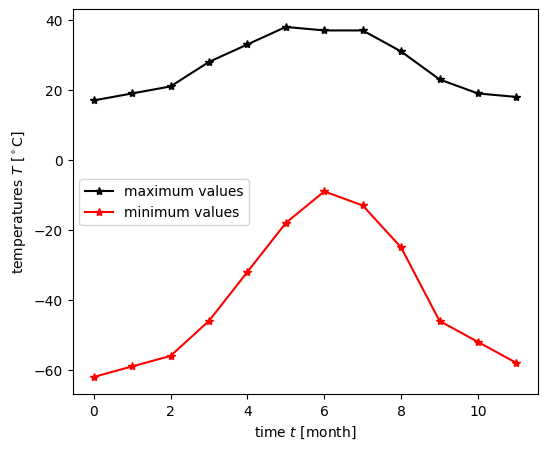

In [60]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(nrows=1,ncols=1,figsize=(6,5))
ax.plot(x,max_val,'*-k',label='maximum values')
ax.plot(x,min_val,'*-r',label='minimum values')
ax.legend()
ax.set_xlabel('time $t$ [month]')
ax.set_ylabel('temperatures $T$ [$^\circ$C]')
plt.show()

In [61]:
def gaussian_fun(x,ampl,mean,sigma,offset):
    return ampl*np.exp(-1*(x-mean)**2/(2*sigma**2))+offset

In [62]:
from scipy import optimize
max_par, max_cov = optimize.curve_fit(gaussian_fun, x, max_val, p0=(20,6,2,20))
min_par, min_cov = optimize.curve_fit(gaussian_fun, x, min_val, p0=(60,6,2,-65))
print(max_par, min_par)

[23.09207413  5.73581572  2.29443237 15.77934045] [ 52.6492925    6.16452593   1.97590025 -61.32093775]


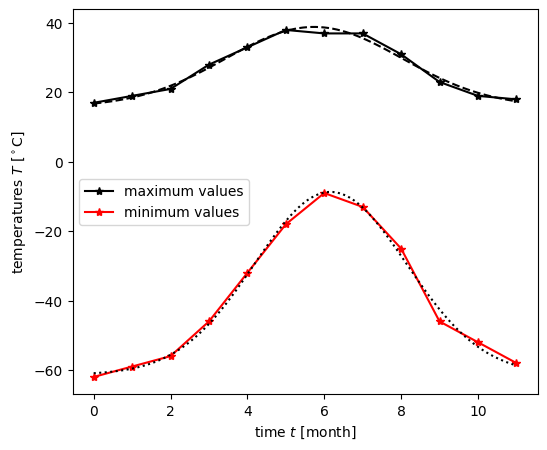

In [63]:
x_fit=np.linspace(start=x.min(),stop=x.max(),num=100)
ax.plot(x_fit,gaussian_fun(x_fit,max_par[0],max_par[1],max_par[2],max_par[3]),'--k',label='fit of maximum')
ax.plot(x_fit,gaussian_fun(x_fit,min_par[0],min_par[1],min_par[2],min_par[3]),':k',label='fit of minimum')
fig

# 9.3\. **2D minimization of a six-hump camelback function** (20 MINUTES)

$$
f(x,y) = \left(4-2.1x^2+\frac{x^4}{3} \right) x^2 +xy + (4y^2 -4)y^2
$$

has multiple global and local minima. Find the global minima of this function.

Hints:

* Variables can be restricted to $-2 < x < 2$ and $-1 < y < 1$.
* Use numpy.meshgrid() and pylab.imshow() to find visually the regions.
* Use scipy.optimize.minimize(), optionally trying out several of its methods.

How many global minima are there, and what is the function value at those points? What happens for an initial guess of $(x, y) = (0, 0)$ ?

https://scipy-lectures.org/intro/scipy/auto_examples/plot_2d_minimization.html

In [64]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as optimize

In [65]:
# firstly, I initialize the function
def fun_f(z):
    x,y=z
    return ( (4 - 2.1*(x**2) + (x**4)/3)*x**2 + x*y + (4*(y**2)-4)*y**2 )

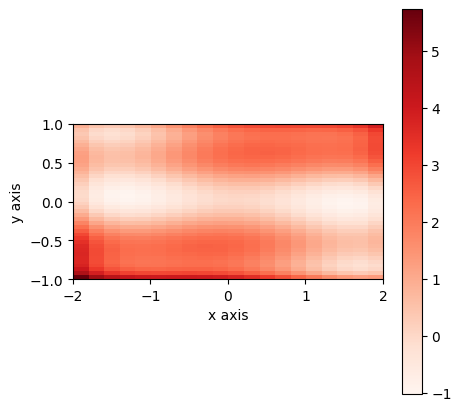

In [66]:
import matplotlib.pyplot as plt
import pylab
# and represent it to have an idea of its behaviour
x = np.arange(start=-2,stop=2,step=0.1)
y = np.arange(start=-1,stop=1,step=0.1)
x_grid, y_grid = np.meshgrid(x, y)
fig2 = plt.figure(figsize=(5, 5))
ax2 = fig2.add_subplot(1, 1,1)
temp = ax2.imshow(fun_f(((x_grid,y_grid))).T,cmap=plt.cm.Reds,origin='lower',extent=[-2,2,-1,1])
fig2.colorbar(temp)
ax2.set_xlabel('x axis')
ax2.set_ylabel('y axis')
plt.show()

In [67]:
min_f = optimize.minimize(fun_f, x0=(0,0), bounds = [(-2,2),(-1,1)])
print(min_f)

      fun: 0.0
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 4.e-08, -4.e-08])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 3
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([0., 0.])


In [68]:
# after some calculation, we're able to see that the midpoint (0,0) of the restricted region of search ((-2,2),(-1,1))
# is a critical point itself. As a direct consequence, the algorithmic search for a minima will stop there if started
# in x0=(0,0). A different starting point x0 must be used.
# Based on the representation, there seem to be another 2 minima (other than (0,0)) in the second and fourth quadrant
# of the alredy restricted region. Therefore, some good starting point might be:
# for the second quadrant, x0=(-0.75,1.5)
# for the fourth quadrant, x0=(1.5,-0.75)

In [69]:
# to find the minimum in the second quadrant
min_f_1 = optimize.minimize(fun_f, x0=(-1.5,0.75), bounds = [(-2,0),(0,1)])
print(min_f_1)

      fun: -0.21546382438356237
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 8.21565043e-07, -2.35367280e-06])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 27
      nit: 6
     njev: 9
   status: 0
  success: True
        x: array([-1.70360667,  0.79608346])


In [70]:
# to find the minimum in the fourth quadrant
min_f_2 = optimize.minimize(fun_f, x0=(1.5,-0.75), bounds = [(0,2),(-1,0)])
print(min_f_2)

      fun: -0.21546382438359601
 hess_inv: <2x2 LbfgsInvHessProduct with dtype=float64>
      jac: array([-2.66453528e-07,  2.32036611e-06])
  message: 'CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL'
     nfev: 27
      nit: 6
     njev: 9
   status: 0
  success: True
        x: array([ 1.70360668, -0.79608347])


# 9.5\. **FFT of an image** (30 MINUTES)

* Examine the provided image `moonlanding.png`, which is heavily contaminated with periodic noise. In this exercise, we aim to clean up the noise using the Fast Fourier Transform.
* Load the image using pylab.imread().
* Find and use the 2-D FFT function in scipy.fftpack, and plot the spectrum (Fourier transform of) the image. Do you have any trouble visualising the spectrum? If so, why?
* The spectrum consists of high and low frequency components. The noise is contained in the high-frequency part of the spectrum, so set some of those components to zero (use array slicing).
* Apply the inverse Fourier transform to see the resulting image.

https://scipy-lectures.org/intro/scipy/auto_examples/solutions/plot_fft_image_denoise.html

In [71]:
import matplotlib.pyplot as plt
import scipy.fftpack as fftpack

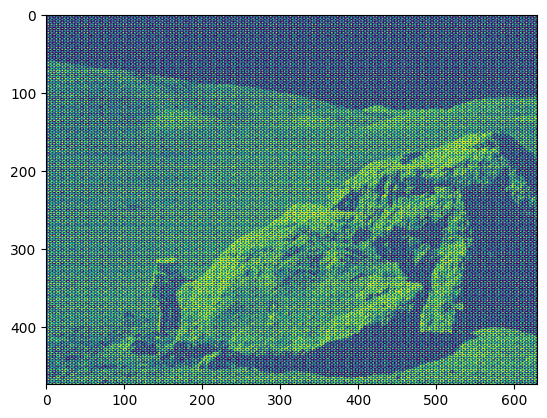

In [72]:
image=plt.imread('moonlanding.png')
plt.imshow(image)
plt.show()

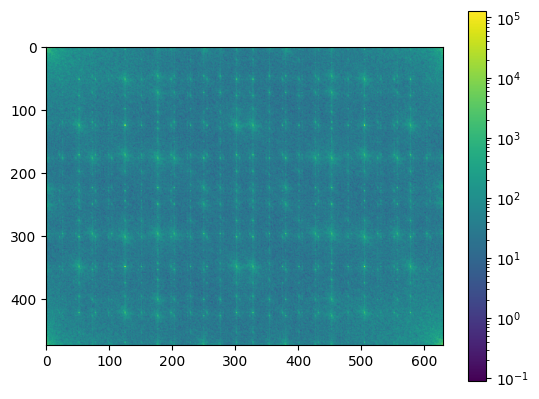

In [73]:
spectrum=fftpack.fft2(image)
temp=plt.imshow(np.abs(spectrum),norm='log')
plt.colorbar(temp)
plt.show()

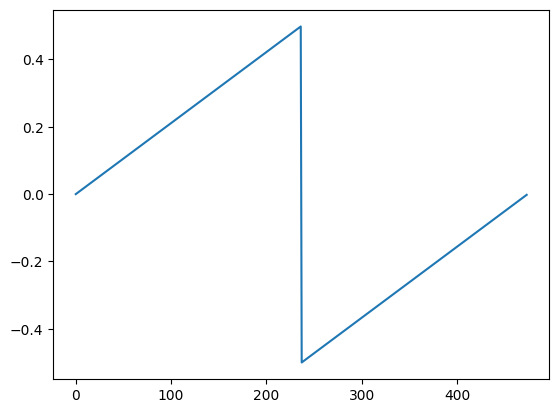

In [74]:
row_freq = np.fft.fftfreq(image.shape[0])
col_freq = np.fft.fftfreq(image.shape[1])
plt.plot(row_freq)

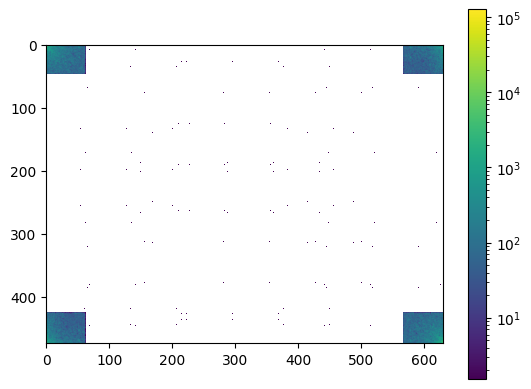

In [75]:
# I make a deep copy of the spectrum before making any change
fixed_spectrum= spectrum.copy()
# and select the fraction of data that we want to get rid of, starting from high frequencies
frac=4/5
r,c=fixed_spectrum.shape
fixed_spectrum[int(r/2*(1-frac)):int(r/2*(1+frac)),:]=0
fixed_spectrum[:,int(c/2*(1-frac)):int(c/2*(1+frac))]=0
temp=plt.imshow(np.abs(fixed_spectrum),norm='log')
plt.colorbar(temp)
plt.show()

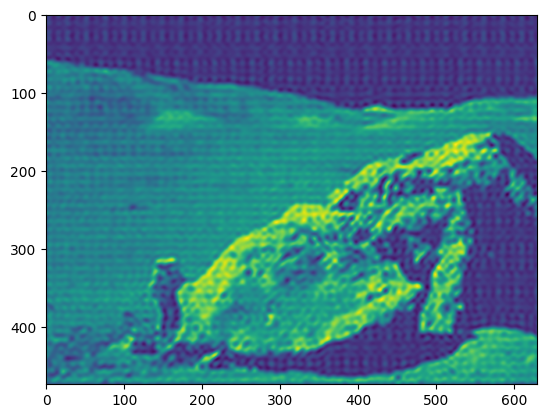

In [76]:
fixed_image=fftpack.ifft2(fixed_spectrum).real
plt.imshow(fixed_image)
plt.show()

# 10.1\. **Radioactive decay chain** (30 MINUTES)

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-lieve of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

In [77]:
import numpy as np
import matplotlib.pyplot as plt

In [78]:
# firstly, I define the half-life
half_life = 3.052*60 # s
# and initialize the values of time
t = np.arange(start=0,stop=5*half_life,step=1)
# to get the probability of decay
prob = 1 - 2**(-t / half_life)

In [79]:
# I initialize the vectors with the number of atoms in time
n_Tl = np.zeros(t.size)
n_Pb = np.zeros(t.size)
# with an initial sample of 1000 Tl atoms and 0 Pb atoms
n_Tl[0],n_Pb[0]=1000,0

temp = n_Tl[0]*prob
n_Tl = n_Tl[0]*np.ones(t.size) - temp
n_Pb = n_Pb[0]*np.ones(t.size) + temp

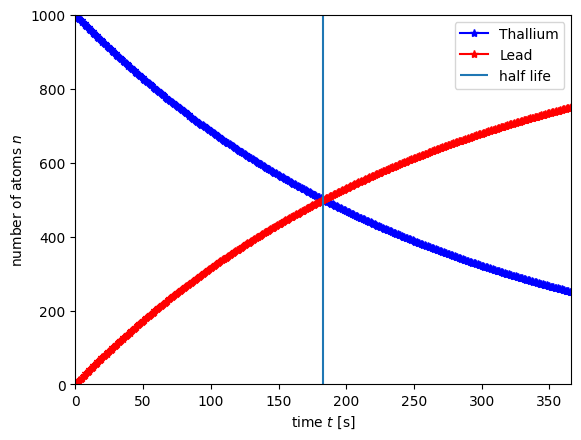

In [80]:
fig,ax = plt.subplots(nrows=1,ncols=1)
ax.plot(t,n_Tl,'-*b',label='Thallium')
ax.plot(t,n_Pb,'-*r',label='Lead')
ax.vlines(x=half_life,ymin=0,ymax=1000,label='half life')
ax.set_xlim(0,2*half_life)
ax.set_ylim(0,1000)
ax.set_xlabel('time $t$ [s]')
ax.set_ylabel('number of atoms $n$')
ax.legend()
plt.show()


-1473.1100763773236 790.709214001255


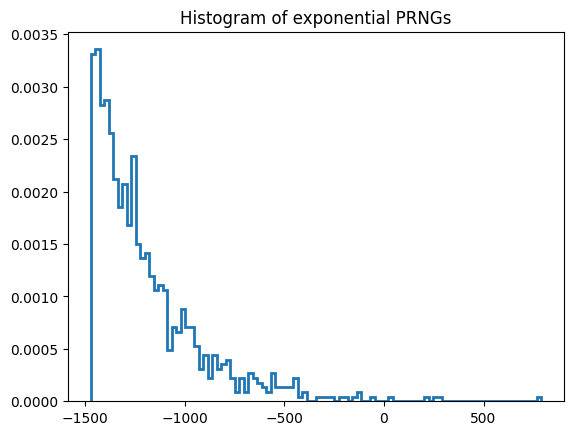

In [81]:
def my_pdf(t,half_life):
    return ( 2**(-t / half_life))

print()
# firstly, I define the (non-uniform) cumulative probability distribution
def my_cdf(t,tau):
    return 2**(-t/tau)*np.log(2)/tau
# and the inverse cumulative distribution function
def my_icdf(z,tau):
    return -tau*np.log2(z*tau/np.log(2))

fig,ax=plt.subplots(nrows=1,ncols=1)
u = np.random.random(1000)
v = my_icdf(u,half_life)
print(v.min(),v.max())
plt.hist(v, histtype='step', bins=100, density=True, linewidth=2)
#plt.plot(t, my_pdf(t,half_life), linewidth=2)
#plt.axis([0,4,0,1])
plt.title('Histogram of exponential PRNGs');

# 10.2\. **Rutherford Scattering** (30 MINUTES)

The scattering angle $\theta$ of $\alpha$ particles hitting a positively charged nucleus of a Gold atom ($Z=79$) follows the rule:

$$
\tan{\frac{1}{2} \theta} = \frac{Z e^2} {2\pi \epsilon_0 E b}
$$

where $E=7.7$ MeV and $b$ beam is the impact parameter. The beam is represented by a 2D gaussian distribution with $\sigma=a_0/100$ for both coordinates ($a_0$ being the Bohr radius). Assume 1 million $\alpha$ particles are shot on the gold atom.

Computing the fraction of particles that "bounce back",i.e. those particle whose scattering angle is greater than $\pi/2$ (which set a condition on the impact parameter $b$)

In [82]:
import numpy as np

# Another method
# the impact parameter is considered from b=0 to b=100fm
# setting the condition on impact parameter b
# min angle=0.1 deg ----> b=16929.7823 fm  
# max angle=180 deg ----> b=0 fm
# In this 3*sigma = 16929fm => sigma = 5e-12m

# Energy
Z = 79
e = 1.6e-19
epsilon0 = 8.854e-12
E = (7.7e6)*(1.6e-19)
a0 = 1e-15 # Bohr radius
N = int(1e6) # No. of particles
sigma = a0/100
b = np.random.normal(scale=sigma,size=N)
#print(b[:20])

theta = 2*np.arctan((Z*e**2)/(2*np.pi*epsilon0*E*b))

# No. of scattering angles greater than pi/2
bounce_back = len(theta[theta>abs(np.pi/2)])

fraction_bounce_back = bounce_back/N

print("No. of particles that bounce back for given sigma=10^-17: ", fraction_bounce_back)


No. of particles that bounce back for given sigma=10^-17:  0.500566


# 10.3\. **Monte Carlo integration: hit/miss vs mean value method** (30 MINUTES)

Consider the function 

$$f(x) =\sin^2{\frac{1}{x(2-x)}}$$

* Compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one

Integral by Monte-Carlo method:  0.72645


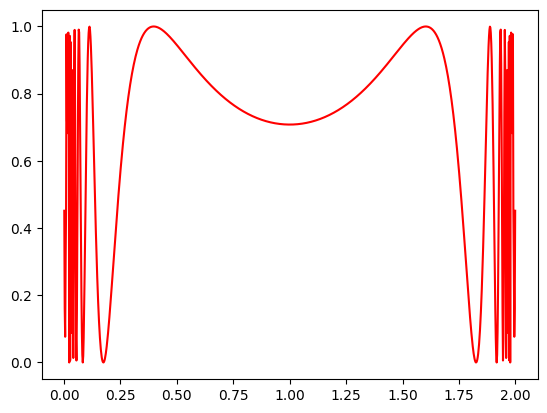

In [83]:
# Hit or Miss method or Monte-Carlo method
def f(x):
    return (np.sin(1/(x*(2-x))))**2

x=np.linspace(0.001,1.999,1000) #at x=0 and x=2 very disturbing things happen. There exists singular points.
plt.plot(x,f(x),'r-')

N=100000
count=0
for i in range(N):
    x=np.random.random()
    y=np.random.random()
    if y<f(x): count+=1
I=count/N
print("Integral by Monte-Carlo method: ",I)

In [84]:
# Mean value method
def f(x):
    return (np.sin(1/(x*(2-x))))**2

N=100000
x = np.random.uniform(size=N)
a = 0
b = 1
I = ((b-a)/N)*sum(f(x))
print("Integral by Mean value method",I)


Integral by Mean value method 0.726918749810807


# 10.4\. **Monte Carlo integration in high dimension** (30 MINUTES)

* Start of by computing the area of a circle of unit radius, by integrating the function 

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere



In [85]:
#Monte Carlo without for loop
import numpy as np

N = 1000000
r=1 #radius
x = np.random.uniform(-1.0,1.0,size=N)
y = np.random.uniform(-1.0,1.0,size=N)
distance = x**2+y**2
points_inside = len(distance[np.sqrt(distance)<=r])
#print(points_inside)
area = 4*(points_inside/N)
print("Area of the circle: ",area)

Area of the circle:  3.141796


In [86]:
# 10D Monte Carlo generalisation without for loop
# https://stackoverflow.com/questions/51091377/how-to-compute-volume-of-10-dimentional-sphere-with-monte-carlo-method-in-python
import numpy as np

def nSphereVolume(dim, N):
    point = np.random.uniform(-1.0, 1.0, size=[N,dim])
    distance = np.apply_along_axis(np.linalg.norm, 1, point)
    count_in_sphere = len(distance[distance<=1])
    #print(count_in_sphere)
    return np.power(2.0, dim) * (count_in_sphere / N)

print("Volume of a 10D sphere: ",nSphereVolume(10, 100000))
print("Area of a circle: ", nSphereVolume(2,100000))

Volume of a 10D sphere:  2.51904
Area of a circle:  3.1338


# 10.5\. **Monte Carlo integration with importance sampling**  (30 MINUTES)

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should get a result about 0.84

In [87]:
import numpy as np
def f(x):
    return x**-0.5/(np.exp(x)+1)

def w(x):
    return np.sqrt(x)**-1

def inv_transform(x): #inverse transform method for sampling
    return np.square(x)/4

n = int(1e6)
x = np.random.uniform(0,2,size=n)
ws = inv_transform(x)
I = (np.sum(f(ws)/w(ws))*2)/n

print(np.round((I),2))

0.84
